In [38]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# acquire volume data to create the quintiles
volume_data = pd.read_csv("all_years_volume_per_stock.csv")
volume_data

,2014,2015,2016,2017,name
0,572795464,645331754,524961956,464185914,A
1,3124304404,2911725962,2309937781,1473813766,AAL
2,200390646,266943089,260856103,417078017,AAP
3,15934013092,13068421452,9686251480,6797072145,AAPL
4,2303234955,2643033869,2020995040,1500433970,ABBV
...,...,...,...,...,...
483,254963686,286855835,330851703,294657337,XYL
484,796553442,1030376098,876677224,543984279,YUM
485,311669645,310492580,396132336,340913979,ZBH
486,623469929,682761849,847701448,623452328,ZION


In [34]:
# separate the volume data into quintiles per year
volume_data_2014 = volume_data[["2014", "name"]]
volume_data_2015 = volume_data[["2015", "name"]]
volume_data_2016 = volume_data[["2016", "name"]]
volume_data_2017 = volume_data[["2017", "name"]]

volume_data_2014["quintile"] = pd.qcut(volume_data_2014["2014"], q = 5, labels=[1, 2, 3, 4, 5])
volume_data_2015["quintile"] = pd.qcut(volume_data_2015["2015"], q = 5, labels=[1, 2, 3, 4, 5])
volume_data_2016["quintile"] = pd.qcut(volume_data_2016["2016"], q = 5, labels=[1, 2, 3, 4, 5])
volume_data_2017["quintile"] = pd.qcut(volume_data_2017["2017"], q = 5, labels=[1, 2, 3, 4, 5])

/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [4]:
volume_data_2014.to_csv("volume_data_2014.csv", index=False)
volume_data_2015.to_csv("volume_data_2015.csv", index=False)
volume_data_2016.to_csv("volume_data_2016.csv", index=False)
volume_data_2017.to_csv("volume_data_2017.csv", index=False)

In [5]:
# calculate returns per quintile per year
price_data = pd.read_csv("all_stocks_4yr.csv")

price_data

,date,open,high,low,close,volume,name,year
0,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL,2014
1,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL,2014
2,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL,2014
3,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL,2014
4,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL,2014
...,...,...,...,...,...,...,...,...
497467,2017-12-22,72.30,72.3700,71.79,71.990,1345683,ZTS,2017
497468,2017-12-26,72.40,72.5500,71.90,72.340,792134,ZTS,2017
497469,2017-12-27,72.59,72.6900,72.25,72.450,1159771,ZTS,2017
497470,2017-12-28,72.49,72.6000,72.14,72.390,710499,ZTS,2017


In [6]:
# create a function to get the percentage change from two values
def pct_change(beginning: float, end: float) -> float:
    return ((end - beginning) / beginning) * 100

pct_change(200, 100)

-50.0

In [7]:
# get the beginning and ending days of the years in scope
first_days = price_data.groupby("year").min()["date"].tolist()
last_days = price_data.groupby("year").max()["date"].tolist()

allowed_days = first_days + last_days
allowed_days

['2014-01-02',
 '2015-01-02',
 '2016-01-04',
 '2017-01-03',
 '2014-12-31',
 '2015-12-31',
 '2016-12-30',
 '2017-12-29']

In [8]:
# filter out only rows that are first or last days 
first_last_days_data = price_data.loc[price_data["date"].isin(allowed_days)]
first_last_days_data.head(20)

,date,open,high,low,close,volume,name,year
0,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,AAL,2014
251,2014-12-31,53.9000,54.6400,53.3200,53.6300,11063024,AAL,2014
252,2015-01-02,54.2800,54.6000,53.0700,53.9100,10756705,AAL,2015
503,2015-12-31,42.5400,42.5700,41.8300,42.3500,6813757,AAL,2015
504,2016-01-04,41.2900,41.3501,40.3000,40.9100,12037151,AAL,2016
755,2016-12-30,47.4200,47.6600,46.4700,46.6900,4495016,AAL,2016
756,2017-01-03,47.2800,47.3400,46.1350,46.3000,6737752,AAL,2017
1006,2017-12-29,52.4200,52.8200,52.0100,52.0300,2697096,AAL,2017
1007,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,AAPL,2014
1258,2014-12-31,112.8200,113.1300,110.2100,110.3800,41403351,AAPL,2014


In [9]:
len(first_last_days_data)

3953

In [10]:
first_last_days_data.reset_index(drop=True)
first_last_days_data.groupby("name").count()

,date,open,high,low,close,volume,year
name,,,,,,,
A,8,8,8,8,8,8,8
AAL,8,8,8,8,8,8,8
AAP,8,8,8,8,8,8,8
AAPL,8,8,8,8,8,8,8
ABBV,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...
XYL,8,8,8,8,8,8,8
YUM,8,8,8,8,8,8,8
ZBH,8,8,8,8,8,8,8


In [11]:
volume_data_2014

,2014,name,quintile
0,572795464,A,3
1,3124304404,AAL,5
2,200390646,AAP,1
3,15934013092,AAPL,5
4,2303234955,ABBV,5
...,...,...,...
483,254963686,XYL,1
484,796553442,YUM,4
485,311669645,ZBH,2
486,623469929,ZION,3


In [12]:
# Create a dictionary with open and close years
years_dict = {2014: ["2014-01-02", "2014-12-31"],
                       2015: ["2015-01-02", "2015-12-31"],
                       2016: ["2016-01-04", "2016-12-30"],
                       2017: ["2017-01-03", "2017-12-29"]}

In [13]:
# function to receive a stock symbol and year and return the annual percentage
def get_stock_annual_return(name: str, year: int) -> float:
    year_open_date = years_dict[year][0]
    year_close_date = years_dict[year][1]
    
    try:
        open_price = first_last_days_data.loc[(first_last_days_data["date"] == year_open_date) & (first_last_days_data["name"] == name), ("open")].head(1).item()
        close_price = first_last_days_data.loc[(first_last_days_data["date"] == year_close_date) & (first_last_days_data["name"] == name), ("close")].head(1).item()
    except Exception as e:
        print(e)
        print(name)
        return None

    return pct_change(open_price, close_price)

In [14]:
# last time 2014 is used due to incomplete data
volume_data_2014["return_%"] = volume_data_2014["name"].apply(lambda name: get_stock_annual_return(name, 2014))

can only convert an array of size 1 to a Python scalar
CFG
can only convert an array of size 1 to a Python scalar
GOOG
can only convert an array of size 1 to a Python scalar
INFO
can only convert an array of size 1 to a Python scalar
NAVI
can only convert an array of size 1 to a Python scalar
SYF


/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# get returns for 2015, 2016, and 2017
volume_data_2015["return_%"] = volume_data_2015["name"].apply(lambda name: get_stock_annual_return(name, 2015))
volume_data_2016["return_%"] = volume_data_2016["name"].apply(lambda name: get_stock_annual_return(name, 2016))
volume_data_2017["return_%"] = volume_data_2017["name"].apply(lambda name: get_stock_annual_return(name, 2017))

/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tiagorocha/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

In [16]:
# get returns for the quintiles in each year
quintile_returns_2015 = volume_data_2015.groupby("quintile").mean()
quintile_returns_2016 = volume_data_2016.groupby("quintile").mean()
quintile_returns_2017 = volume_data_2017.groupby("quintile").mean()

In [17]:
quintile_returns_2017

,2017,return_%
quintile,,
1,1.937522e+08,21.436138
2,3.517964e+08,20.964815
3,5.499048e+08,19.676077
4,9.043578e+08,11.710844
5,2.975958e+09,12.082626


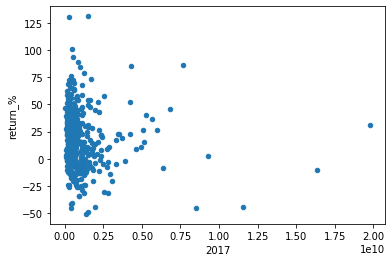

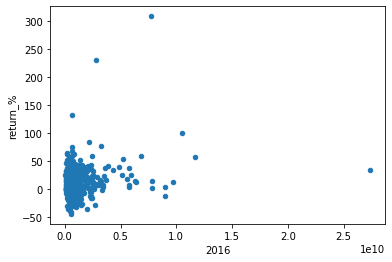

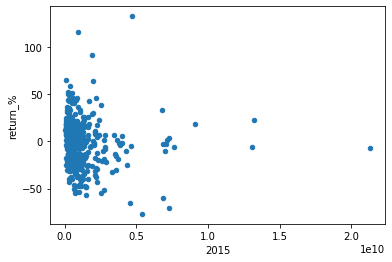

In [18]:
# here we can see the volumes/returns of all of the stocks individually for each of the three years
volume_data_2017.plot.scatter(x="2017", y="return_%")
volume_data_2016.plot.scatter(x="2016", y="return_%")
volume_data_2015.plot.scatter(x="2015", y="return_%")
plt.show()

In [19]:
volume_data_2017.groupby("quintile").max()

,2017,name,return_%
quintile,,,
1,276401805,XEC,130.272567
2,429808329,ZBH,76.271186
3,676240752,ZTS,101.343544
4,1212706367,WY,88.682022
5,19779231722,XOM,131.168831


In [20]:
# used this code to determine which stock had the outsized volume - BAC (Bank of America) each year
volume_data_2017[volume_data_2017["2017"] == 19779231722]

,2017,name,quintile,return_%
59,19779231722,BAC,5,30.619469


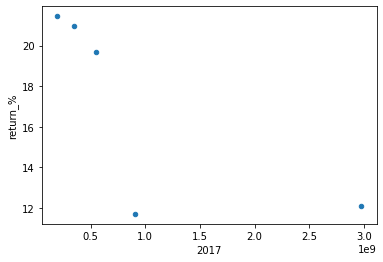

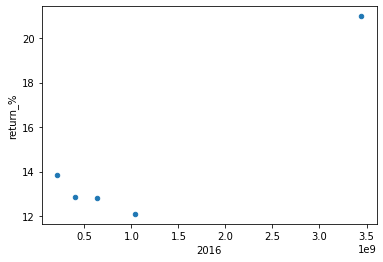

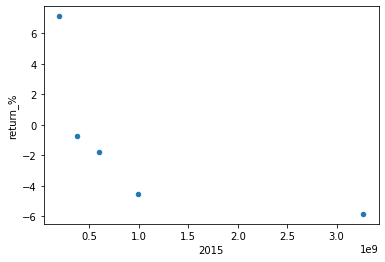

In [21]:
# the returns vary quite a bit, but the volumes are nearly the same for each year
quintile_returns_2017.plot.scatter(x="2017", y="return_%")
quintile_returns_2016.plot.scatter(x="2016", y="return_%")
quintile_returns_2015.plot.scatter(x="2015", y="return_%")
plt.show()

In [98]:
# looking at the data for the years 2015, 2016 and 2017
threeyears_index=pd.read_csv("SP500_1.csv")

In [89]:
threeyears_index['DATE']=threeyears_index['DATE'].astype('datetime64[ns]')

In [90]:
threeyears_index=threeyears_index[threeyears_index['SP500']!='.']

In [93]:
threeyears_index['SP500']=threeyears_index['SP500'].astype('float')
threeyears_index

,DATE,SP500
0,2015-01-02,2058.20
1,2015-01-05,2020.58
2,2015-01-06,2002.61
3,2015-01-07,2025.90
4,2015-01-08,2062.14
...,...,...
775,2017-12-22,2683.34
777,2017-12-26,2680.50
778,2017-12-27,2682.62
779,2017-12-28,2687.54


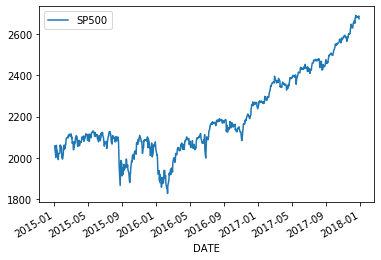

In [78]:
threeyears_index.plot(x='DATE', y='SP500')